## Clothin Store
### - _Ankur Patel_

### Introduction:

The Clothing_store_training_test data set contains information about customers on the 119 variables. The target variable is the Response of 1 or 0, which is True or False. A classification model will be developed to maximize profits for direct-mail marketing.

### Preprocessing:

In [1]:
# read library
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [4]:
# reading the clothing_store_training_test dataset
df = read.csv(file.choose())
head(df)

HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,ln.lifetime.ave.time.betw.visits,ln.product.uniformity,sqrt.responded,flag.returns,flag.response.rate,flag.markdown,sqrt.spending.months.2.3,sqrt.spending.months.4.5.6,flag.spending.months.4.5.6,flag.spending.months.2.3
9.9556e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,4.709530,3.459781,0.000000,FALSE,FALSE,TRUE,0.000000,0.000000,FALSE,FALSE
9.9556e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,3.772761,3.487987,1.414214,TRUE,TRUE,TRUE,9.055937,10.954451,TRUE,TRUE
9.9556e+12,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,4.228293,4.605170,0.000000,FALSE,FALSE,TRUE,0.000000,0.000000,FALSE,FALSE
9.9556e+12,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,3.294354,3.147165,2.449490,FALSE,TRUE,TRUE,10.244023,16.399085,TRUE,TRUE
9.9556e+12,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,3.198673,3.350606,0.000000,FALSE,FALSE,TRUE,9.350936,0.000000,FALSE,TRUE
9.9556e+12,1106,26,2,120.00,0,60.00,11,0.00,0.56,...,4.283587,3.888550,0.000000,FALSE,FALSE,TRUE,0.000000,7.615773,TRUE,FALSE


In [36]:
# dataset size and datatype of variables
str(df)

'data.frame':	2619 obs. of  119 variables:
 $ HHKEY                           : num  9.96e+12 9.96e+12 9.96e+12 9.96e+12 9.96e+12 ...
 $ ZIP_CODE                        : int  1001 1028 1056 1118 1107 1106 1108 1118 1106 1104 ...
 $ REC                             : int  208 6 327 66 49 26 98 145 356 264 ...
 $ FRE                             : int  2 4 2 8 1 2 3 1 1 1 ...
 $ MON                             : num  368.5 258 77 846.1 87.4 ...
 $ CC_CARD                         : int  0 1 0 1 0 0 0 1 0 0 ...
 $ AVRG                            : num  184.2 64.5 38.5 105.8 87.4 ...
 $ PC_CALC20                       : int  11 11 11 11 11 11 11 11 11 11 ...
 $ PSWEATERS                       : num  0.18 0.26 1 0.38 0.2 0 0.16 0.12 0 0.24 ...
 $ PKNIT_TOPS                      : num  0 0.16 0 0 0.2 0.56 0.06 0 0 0 ...
 $ PKNIT_DRES                      : num  0 0 0 0.05 0 0 0 0 0 0 ...
 $ PBLOUSES                        : num  0.3 0 0 0.06 0 0 0 0 0 0 ...
 $ PJACKETS                        :

In [6]:
# drop any incomplete records
df = df[complete.cases(df),]

In [7]:
# variables
colnames(df)

[1] "HHKEY"                            "ZIP_CODE"                        
  [3] "REC"                              "FRE"                             
  [5] "MON"                              "CC_CARD"                         
  [7] "AVRG"                             "PC_CALC20"                       
  [9] "PSWEATERS"                        "PKNIT_TOPS"                      
 [11] "PKNIT_DRES"                       "PBLOUSES"                        
 [13] "PJACKETS"                         "PCAR_PNTS"                       
 [15] "PCAS_PNTS"                        "PSHIRTS"                         
 [17] "PDRESSES"                         "PSUITS"                          
 [19] "POUTERWEAR"                       "PJEWELRY"                        
 [21] "PFASHION"                         "PLEGWEAR"                        
 [23] "PCOLLSPND"                        "AMSPEND"                         
 [25] "PSSPEND"                          "CCSPEND"                         
 [27] "AXSPEND"                          "TMONSPEND"                       
 [29] "OMONSPEND"                        "SMONSPEND"                       
 [31] "PREVPD"                           "GMP"                             
 [33] "PROMOS"                           "DAYS"                            
 [35] "FREDAYS"                          "MARKDOWN"                        
 [37] "CLASSES"                          "COUPONS"                         
 [39] "STYLES"                           "STORES"                          
 [41] "STORELOY"                         "VALPHON"                         
 [43] "WEB"                              "MAILED"                          
 [45] "RESPONDED"                        "RESPONSERATE"                    
 [47] "HI"                               "LTFREDAY"                        
 [49] "CLUSTYPE"                         "PERCRET"                         
 [51] "RESP"                             "Tot_Spend"                       
 [53] "Sales.per.Visit"                  "Spending_Month_2_3"              
 [55] "Spending_Month_4_5_6"             "bc.purchase.visits"              
 [57] "ln.total.net.sales"               "ln_ave.spending.per.visit"       
 [59] "sqrt.sweaters"                    "sqrt.knit.tops"                  
 [61] "sqrt.knit.dresses"                "sqrt.blouses"                    
 [63] "sqrt.jackets"                     "sqrt.career.pants"               
 [65] "sqrt.casual.pants"                "sqrt.shirts"                     
 [67] "sqrt.dresses"                     "sqrt.suits"                      
 [69] "sqrt.outerwear"                   "sqrt.jewelry"                    
 [71] "sqrt.fashion"                     "sqrt.legwear"                    
 [73] "sqrt.collectibles"                "flag.sweaters"                   
 [75] "flag.knit.tops"                   "flag.knit.dresses"               
 [77] "flag.blouses"                     "flag.jackets"                    
 [79] "flag.career.pants"                "flag.casual.pants"               
 [81] "flag.shirts"                      "flag.dresses"                    
 [83] "flag.suits"                       "flag.outerwear"                  
 [85] "flag.jewelry"                     "flag.fashion"                    
 [87] "flag.legwear"                     "flag.collectibles"               
 [89] "sqrt.spending.AM"                 "sqrt.spending.PS"                
 [91] "sqrt.spending.CC"                 "sqrt.spending.AX"                
 [93] "sqrt.spending.last.three.months"  "sqrt.spending.last.one.month"    
 [95] "sqrt.spending.last.six.months"    "sqrt.spending.SPLY"              
 [97] "flag.spending.AM"                 "flag.spending.PS"                
 [99] "flag.spending.CC"                 "flag.spending.AX"                
[101] "flag.spending.last.three.months"  "flag.spending.last.one.month"    
[103] "flag.spending.last.six.months"    "flag.spending.SPLY"              
[105] "ln.days.between.purchases"        "ln...dif

In [8]:
# check non-numeric columns
for( k in colnames(df) ){
    i = class( df[, k] )
    if( (i != "numeric") && (i != "integer") ){
        print( k )
    }
}

[1] "VALPHON"
[1] "flag.sweaters"
[1] "flag.knit.tops"
[1] "flag.knit.dresses"
[1] "flag.blouses"
[1] "flag.jackets"
[1] "flag.career.pants"
[1] "flag.casual.pants"
[1] "flag.shirts"
[1] "flag.dresses"
[1] "flag.suits"
[1] "flag.outerwear"
[1] "flag.jewelry"
[1] "flag.fashion"
[1] "flag.legwear"
[1] "flag.collectibles"
[1] "flag.spending.AM"
[1] "flag.spending.PS"
[1] "flag.spending.CC"
[1] "flag.spending.AX"
[1] "flag.spending.last.three.months"
[1] "flag.spending.last.one.month"
[1] "flag.spending.last.six.months"
[1] "flag.spending.SPLY"
[1] "flag.returns"
[1] "flag.response.rate"
[1] "flag.markdown"
[1] "flag.spending.months.4.5.6"
[1] "flag.spending.months.2.3"


In [9]:
# change the string value of Y to numeric 1.0
vp = rep(0.0, dim(df)[1])
vp[df$VALPHON=="Y"] = 1.0
df$VALPHON = vp

In [37]:
# "true/yes" the first level of the factor:
df$RESP[df$RESP == 1] = "Yes"
df$RESP[df$RESP == 0] = "No" 
df$RESP = factor(df$RESP, levels=c("Yes","No") )

In [14]:
# check balance
print(table(df$RESP))
print(table(df$RESP) / sum(T))


 Yes   No 
 388 2231 

      Yes        No 
0.1481481 0.8518519 


In [15]:
# check if any zero variance predictors in the features
cols_0 = nearZeroVar(df[,-51] )
colname = colnames(df)
print(sprintf("Dropping %5d features due to zero variance from %5d (%8.4f fraction)", 
              length(cols_0), length(colname), length(cols_0)/length(colname)) )
print("Features dropped:" )
print(colname[cols_0])

[1] "Dropping    27 features due to zero variance from   119 (  0.2269 fraction)"
[1] "Features dropped:"
 [1] "PKNIT_DRES"        "PJACKETS"          "PCAR_PNTS"        
 [4] "PCAS_PNTS"         "PSHIRTS"           "PDRESSES"         
 [7] "PSUITS"            "POUTERWEAR"        "PJEWELRY"         
[10] "PFASHION"          "PCOLLSPND"         "AMSPEND"          
[13] "WEB"               "PERCRET"           "sqrt.knit.tops"   
[16] "sqrt.blouses"      "sqrt.jackets"      "sqrt.career.pants"
[19] "sqrt.casual.pants" "sqrt.shirts"       "sqrt.dresses"     
[22] "sqrt.suits"        "sqrt.outerwear"    "sqrt.jewelry"     
[25] "sqrt.legwear"      "flag.collectibles" "flag.spending.PS" 


### Review:
- dataset size: 2619 x 119
- datatypes: integer, numeric, logical, factor
- VALPHON was non-numeric so was converted to 1 0
- factor of RESP is target, and its 1 and 0 were turned to Yes and No
    - ~15% Yes, ~85% No
- the nonzero identical values were dropped, which was about 23%

### Models:
- Random Forest: method="rf"
- Flexible Discriminant Analysis: method="fda"



In [27]:
# train test set
set.seed(24)  # this makes the example exactly reproducible
split = createDataPartition(df$VALPHON, p=0.7 )[[1]]

In [85]:
# validate by seeing fraction of train test sets of p=0.7 and p=0.3
tt_split = table(df$VALPHON[split])
print(tt_split/sum(tt_split))
tt_not_split = table(df$VALPHON[-split])
print(tt_not_split/sum(tt_not_split))


        0         1 
0.2311887 0.7688113 

       0        1 
0.211465 0.788535 


In [43]:
# training and other sets
training = df[\split,]
other = df[-split,]

In [44]:
# split other into evaluation and test set
split2 = createDataPartition(other$VALPHON, p=1./3)[[1]]
evaluation = other[split2,]
testing = other[-split2,]

In [45]:
# build classification models (following books examples)
# functions for performance measures
fiveStats = function(...) c(twoClassSummary(...), defaultSummary(...))
fourStats = function(data, lev=levels(data$obs), model=NULL){
    accKapp = postResample(data[, "pred"], data[, "obs"])
    out = c(accKapp,
        sensitivity(data[, "pred"], data[, "obs"], lev[1]),
        specificity(data[, "pred"], data[, "obs"], lev[2]))
    names(out)[3:4] = c("Sens", "Spec")
    out
}

In [46]:
ctrl = trainControl( method="cv", number=5, classProbs=TRUE, summaryFunction=fiveStats, verboseIter=TRUE )


In [47]:
ctrlNoProb = ctrl
ctrlNoProb$classProbs = FALSE
ctrlNoProb$summaryFunction = fourStats

In [48]:
set.seed(1410)
rfFit = train( RESP ~ ., data=training, method="rf", trControl=ctrl, ntree=500, tuneLength=5, metric="ROC" )

+ Fold1: mtry=  2 
- Fold1: mtry=  2 
+ Fold1: mtry= 31 
- Fold1: mtry= 31 
+ Fold1: mtry= 60 
- Fold1: mtry= 60 
+ Fold1: mtry= 89 
- Fold1: mtry= 89 
+ Fold1: mtry=118 
- Fold1: mtry=118 
+ Fold2: mtry=  2 
- Fold2: mtry=  2 
+ Fold2: mtry= 31 
- Fold2: mtry= 31 
+ Fold2: mtry= 60 
- Fold2: mtry= 60 
+ Fold2: mtry= 89 
- Fold2: mtry= 89 
+ Fold2: mtry=118 
- Fold2: mtry=118 
+ Fold3: mtry=  2 
- Fold3: mtry=  2 
+ Fold3: mtry= 31 
- Fold3: mtry= 31 
+ Fold3: mtry= 60 
- Fold3: mtry= 60 
+ Fold3: mtry= 89 
- Fold3: mtry= 89 
+ Fold3: mtry=118 
- Fold3: mtry=118 
+ Fold4: mtry=  2 
- Fold4: mtry=  2 
+ Fold4: mtry= 31 
- Fold4: mtry= 31 
+ Fold4: mtry= 60 
- Fold4: mtry= 60 
+ Fold4: mtry= 89 
- Fold4: mtry= 89 
+ Fold4: mtry=118 
- Fold4: mtry=118 
+ Fold5: mtry=  2 
- Fold5: mtry=  2 
+ Fold5: mtry= 31 
- Fold5: mtry= 31 
+ Fold5: mtry= 60 
- Fold5: mtry= 60 
+ Fold5: mtry= 89 
- Fold5: mtry= 89 
+ Fold5: mtry=118 
- Fold5: mtry=118 
Aggregating results
Selecting tuning parameters
Fi

In [58]:
# next method
install.packages("fda")
install.packages("earth")
install.packages("mda")

Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'fda' is in use and will not be installed"Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'plotrix', 'Formula', 'plotmo', 'TeachingDemos'



package 'plotrix' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'plotmo' successfully unpacked and MD5 sums checked
package 'TeachingDemos' successfully unpacked and MD5 sums checked
package 'earth' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpQTBOgg\downloaded_packages


Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'mda' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpQTBOgg\downloaded_packages


In [59]:
library(fda)
library(earth)
library(mda)
set.seed(1410)
fdaFit = train( RESP ~ ., data=training, method="fda", tuneLength=10, trControl=ctrl, metric="ROC" )

Loading required package: Formula
Loading required package: plotmo
Loading required package: plotrix
Loading required package: TeachingDemos
Loading required package: class
Loaded mda 0.4-10



+ Fold1: nprune= 2, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune= 2, degree=1 
+ Fold1: nprune= 3, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune= 3, degree=1 
+ Fold1: nprune= 5, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune= 5, degree=1 
+ Fold1: nprune= 7, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune= 7, degree=1 
+ Fold1: nprune= 8, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune= 8, degree=1 
+ Fold1: nprune=10, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune=10, degree=1 
+ Fold1: nprune=12, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune=12, degree=1 
+ Fold1: nprune=13, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune=13, degree=1 
+ Fold1: nprune=15, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune=15, degree=1 
+ Fold1: nprune=17, degree=1 


Warning message:
"duplicate term name "h(HHKEY-9.95561e+12)"
This is usually caused by cuts that are very close to each other
Remedy: use options(digits=NDIGITS), typically NDIGITS has to be at least 7 (currently NDIGITS=7)"

- Fold1: nprune=17, degree=1 
+ Fold2: nprune= 2, degree=1 
- Fold2: nprune= 2, degree=1 
+ Fold2: nprune= 3, degree=1 
- Fold2: nprune= 3, degree=1 
+ Fold2: nprune= 5, degree=1 
- Fold2: nprune= 5, degree=1 
+ Fold2: nprune= 7, degree=1 
- Fold2: nprune= 7, degree=1 
+ Fold2: nprune= 8, degree=1 
- Fold2: nprune= 8, degree=1 
+ Fold2: nprune=10, degree=1 
- Fold2: nprune=10, degree=1 
+ Fold2: nprune=12, degree=1 
- Fold2: nprune=12, degree=1 
+ Fold2: nprune=13, degree=1 
- Fold2: nprune=13, degree=1 
+ Fold2: nprune=15, degree=1 
- Fold2: nprune=15, degree=1 
+ Fold2: nprune=17, degree=1 
- Fold2: nprune=17, degree=1 
+ Fold3: nprune= 2, degree=1 
- Fold3: nprune= 2, degree=1 
+ Fold3: nprune= 3, degree=1 
- Fold3: nprune= 3, degree=1 
+ Fold3: nprune= 5, degree=1 
- Fold3: nprune= 5, degree=1 
+ Fold3: nprune= 7, degree=1 
- Fold3: nprune= 7, degree=1 
+ Fold3: nprune= 8, degree=1 
- Fold3: nprune= 8, degree=1 
+ Fold3: nprune=10, degree=1 
- Fold3: nprune=10, degree=1 
+ Fold3: n

In [60]:
# Compare our estimated sensitivity and specificity for these methods on the training data:
# 
res = matrix( data=c( mean( rfFit$resample$ROC ), mean( rfFit$resample$Spec ), mean( rfFit$resample$Sens ),
                      mean( fdaFit$resample$ROC ), mean( fdaFit$resample$Spec ), mean( fdaFit$resample$Sens ) ),
    nrow=2, ncol=2, byrow=T )
res = data.frame( res )
rownames(res) = c("RF", "FDA" )
colnames(res) = c("AUC", "Sens" )
print(res)

          AUC      Sens
RF  0.8204992 0.9583681
FDA 0.2240404 0.8458176


In [61]:
# What are our default sensitivity and specificity for these methods on the evaluation set?
#
evalResults = data.frame( RESP = evaluation$RESP ) # put in the truth
evalResults$RF = predict( rfFit, newdata=evaluation, type="prob" )[,1]
evalResults$FDA = predict( fdaFit, newdata=evaluation, type="prob" )[,1]

In [63]:
# Part (c): Construct lift plots on the above classifiers
#
install.packages("pROC")
library(pROC)
rfROC = roc( evalResults$RESP, evalResults$RF, levels=rev( levels(evalResults$RESP) ) )
FDAROC = roc( evalResults$RESP, evalResults$FDA, levels=rev( levels(evalResults$RESP) ) )

Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpQTBOgg\downloaded_packages


Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting direction: controls < cases
Setting direction: controls < cases


In [66]:
# Part (d): Using sampling methods on several models
#
#
set.seed(1103)
upSampleTraining = upSample( x=training[,-51] , y=training$RESP, yname="RESP" )
print( table( upSampleTraining$RESP ) )



 Yes   No 
1562 1562 


In [67]:
# Lets build the same models as above but using this new dataset:
#
set.seed(1410)
rfFit_us = train( RESP ~ ., data=upSampleTraining, method="rf", trControl = ctrl, ntree = 500, tuneLength = 5, metric = "ROC" )

+ Fold1: mtry=  2 
- Fold1: mtry=  2 
+ Fold1: mtry= 31 
- Fold1: mtry= 31 
+ Fold1: mtry= 60 
- Fold1: mtry= 60 
+ Fold1: mtry= 89 
- Fold1: mtry= 89 
+ Fold1: mtry=118 
- Fold1: mtry=118 
+ Fold2: mtry=  2 
- Fold2: mtry=  2 
+ Fold2: mtry= 31 
- Fold2: mtry= 31 
+ Fold2: mtry= 60 
- Fold2: mtry= 60 
+ Fold2: mtry= 89 
- Fold2: mtry= 89 
+ Fold2: mtry=118 
- Fold2: mtry=118 
+ Fold3: mtry=  2 
- Fold3: mtry=  2 
+ Fold3: mtry= 31 
- Fold3: mtry= 31 
+ Fold3: mtry= 60 
- Fold3: mtry= 60 
+ Fold3: mtry= 89 
- Fold3: mtry= 89 
+ Fold3: mtry=118 
- Fold3: mtry=118 
+ Fold4: mtry=  2 
- Fold4: mtry=  2 
+ Fold4: mtry= 31 
- Fold4: mtry= 31 
+ Fold4: mtry= 60 
- Fold4: mtry= 60 
+ Fold4: mtry= 89 
- Fold4: mtry= 89 
+ Fold4: mtry=118 
- Fold4: mtry=118 
+ Fold5: mtry=  2 
- Fold5: mtry=  2 
+ Fold5: mtry= 31 
- Fold5: mtry= 31 
+ Fold5: mtry= 60 
- Fold5: mtry= 60 
+ Fold5: mtry= 89 
- Fold5: mtry= 89 
+ Fold5: mtry=118 
- Fold5: mtry=118 
Aggregating results
Selecting tuning parameters
Fi

In [68]:
set.seed(1410)
fdaFit_us = train( RESP ~ ., data=upSampleTraining, method="fda", tuneLength = 10, trControl = ctrl, metric = "ROC" )

+ Fold1: nprune= 2, degree=1 
- Fold1: nprune= 2, degree=1 
+ Fold1: nprune= 3, degree=1 
- Fold1: nprune= 3, degree=1 
+ Fold1: nprune= 5, degree=1 
- Fold1: nprune= 5, degree=1 
+ Fold1: nprune= 7, degree=1 
- Fold1: nprune= 7, degree=1 
+ Fold1: nprune= 8, degree=1 
- Fold1: nprune= 8, degree=1 
+ Fold1: nprune=10, degree=1 
- Fold1: nprune=10, degree=1 
+ Fold1: nprune=12, degree=1 
- Fold1: nprune=12, degree=1 
+ Fold1: nprune=13, degree=1 
- Fold1: nprune=13, degree=1 
+ Fold1: nprune=15, degree=1 
- Fold1: nprune=15, degree=1 
+ Fold1: nprune=17, degree=1 
- Fold1: nprune=17, degree=1 
+ Fold2: nprune= 2, degree=1 
- Fold2: nprune= 2, degree=1 
+ Fold2: nprune= 3, degree=1 
- Fold2: nprune= 3, degree=1 
+ Fold2: nprune= 5, degree=1 
- Fold2: nprune= 5, degree=1 
+ Fold2: nprune= 7, degree=1 
- Fold2: nprune= 7, degree=1 
+ Fold2: nprune= 8, degree=1 
- Fold2: nprune= 8, degree=1 
+ Fold2: nprune=10, degree=1 
- Fold2: nprune=10, degree=1 
+ Fold2: nprune=12, degree=1 
- Fold2: n

In [69]:
# Compare our estimated sensitivity and specificity for these methods on the training data:
#
res = matrix( data=c( mean( rfFit_us$resample$ROC ), mean( rfFit_us$resample$Spec ), mean( rfFit_us$Eesample$Sens ), 
                      mean( fdaFit_us$resample$ROC ), mean( fdaFit_us$resample$Spec ), mean( fdaFit_us$resample$Sens ) ),
               nrow=2, ncol=3, byrow=T )
res = data.frame( res )
rownames(res) = c("RF", "FDA" )
colnames(res) = c("AUC", "Spec", "Sens" )
print(res)

Warning message in mean.default(rfFit_us$Eesample$Sens):
"argument is not numeric or logical: returning NA"

          AUC      Spec      Sens
RF  0.9954445 0.9135701        NA
FDA 0.8644210 0.7221983 0.8450868


In [70]:
# What are our default sensitivity and specificity for these upsampled methods on the evaluation set?
#
evalResults = data.frame( RESP = evaluation$RESP ) # put in the truth
evalResults$RF = predict( rfFit_us, newdata=evaluation, type="prob" )[,1]
evalResults$FDA = predict( fdaFit_us, newdata=evaluation, type="prob" )[,1]

In [79]:
library(pROC)
rfROC = roc( evalResults$RESP, evalResults$RF, levels=rev( levels(evalResults$RESP) ) )
print(rfROC)
FDAROC = roc( evalResults$RESP, evalResults$FDA, levels=rev( levels(evalResults$RESP) ) )
print(FDAROC)

Setting direction: controls < cases



Call:
roc.default(response = evalResults$RESP, predictor = evalResults$RF,     levels = rev(levels(evalResults$RESP)))

Data: evalResults$RF in 223 controls (evalResults$RESP No) < 39 cases (evalResults$RESP Yes).
Area under the curve: 0.8425


Setting direction: controls < cases



Call:
roc.default(response = evalResults$RESP, predictor = evalResults$FDA,     levels = rev(levels(evalResults$RESP)))

Data: evalResults$FDA in 223 controls (evalResults$RESP No) < 39 cases (evalResults$RESP Yes).
Area under the curve: 0.8783


Warning message in if (!add) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (identity) suppressWarnings(abline(ifelse(percent, 100, 1), :
"the condition has length > 1 and only the first element will be used"

ERROR: Error in sprintf("LR (%f)", logRegROC$auc): object 'logRegROC' not found


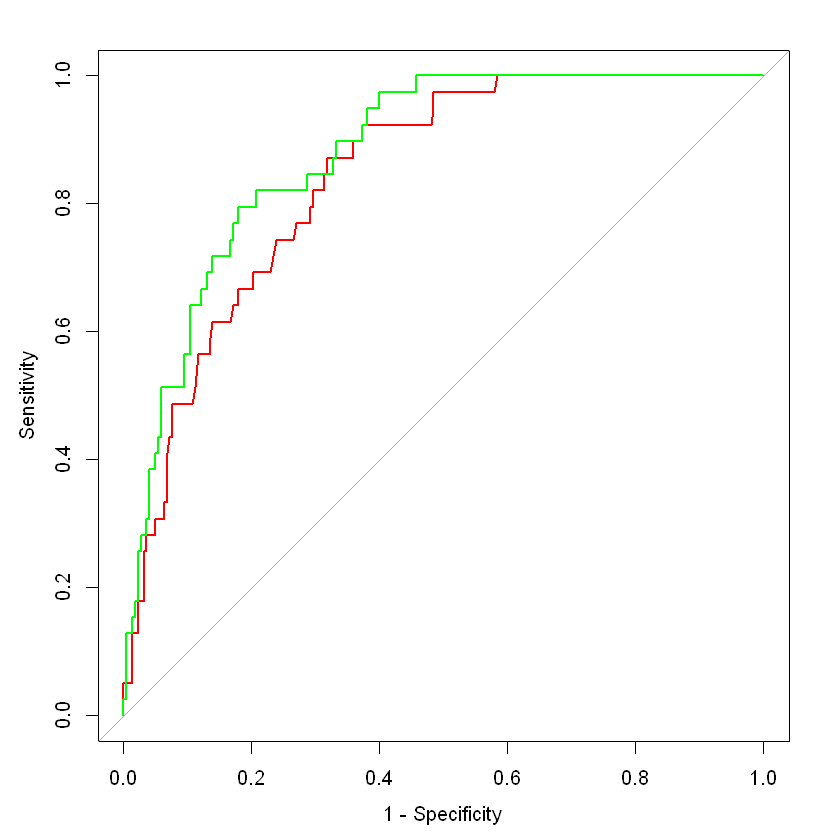

In [72]:
plot(rfROC, legacy.axes=TRUE, col="red")
plot(FDAROC, legacy.axes=TRUE, add=T, col="green")
legend( x="bottomright", c(sprintf("RF (%f)", rfROC$auc), sprintf("LR (%f)", logRegROC$auc), sprintf("FDA (%f)", FDAROC$auc)), col=c("red","blue", "green"), lty=c(1,1,1) )

In [1]:
baseline = coords( rfROC, X=0.5, input="threshold" )
rfThresh_ctopleft = coords( rfROC, x="best", best.method="closest.topleft" )
rfThresh_youden = coords( rfROC, x="best", best.method="youden" )
print( rbind( baseline, rfThresh_ctopleft, rfThresh_youden ) )


ERROR: Error in coords(rfROC, X = 0.5, input = "threshold"): could not find function "coords"


### Conclusion:
